In [11]:
import numpy as np
import matplotlib.pyplot as py
import pandas as pd

In [12]:
data=pd.read_csv('D:\datas\excel\Day15\mydata.csv')
data=data.dropna()
input_train=np.array(data.x[:500]).reshape(500,1)
output_train=np.array(data.y[:500]).reshape(500,1)
input_test=np.array(data.x[500:]).reshape(199,1)
output_test=np.array(data.y[500:]).reshape(199,1)

In [14]:
class Linear:
    def __init__(self):
        self.parameter={}

    def forwar(self,input_train):
        m=self.parameter['m']
        c=self.parameter['c']
        prediction=np.multiply(m,input_train)+c
        return prediction
    
    def cost_i(self,output_train,prediction):
        cost=np.mean((output_train-prediction)**2)
        return cost
    
    def equestion(self,input_train,output_train,prediction):
        equ={}
        df=(output_train-prediction)*-1
        dm=np.mean(np.multiply(input_train,df))
        dc=np.mean(df)
        equ['dm']=dm
        equ['dc']=dc
        return equ
    
    def update(self,learning,equ):
        self.parameter['m']=self.parameter['m']-learning*equ['dm']
        self.parameter['c']=self.parameter['m']-learning*equ['dc']

    def train(self,input_train,output_train,learning,iters):
        self.parameter['c']=np.random.uniform(0,1)*-1
        self.parameter['m']=np.random.uniform(0,1)*-1
        self.loss=[]
        for i in range(iters):
            prediction=self.forwar(input_train)

            cost=self.cost_i(output_train,prediction)

            self.loss.append(cost)
            print(f'{i+1} itration {cost}')

            equ=self.equestion(input_train,output_train,prediction)
            self.update(learning,equ)
        return self.parameter,self.loss


In [15]:
myone=Linear()
parameter,loss=myone.train(input_train,output_train,0.0001,20)
print(parameter)


1 itration 5694.272103888825
2 itration 2497.2357272719237
3 itration 1121.2302503273324
4 itration 505.88786732306636
5 itration 230.72071515768815
6 itration 107.67790868028968
7 itration 52.66231924992516
8 itration 28.06599062338605
9 itration 17.071188146850012
10 itration 12.15754362643909
11 itration 9.962369257358365
12 itration 8.9821843686376
13 itration 8.544856186423832
14 itration 8.349962962158642
15 itration 8.263263283617015
16 itration 8.224797351455269
17 itration 8.207800505338088
18 itration 8.2003368546853
19 itration 8.197091029405165
20 itration 8.19570100023805
{'c': 0.9821108813164787, 'm': 0.9821384764757631}


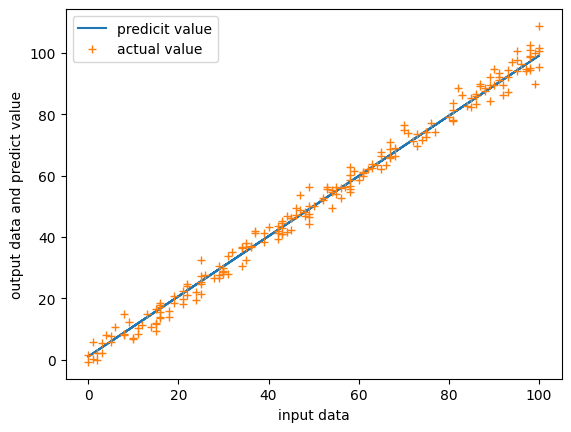

In [16]:
y_data=(input_test*parameter['m']+parameter['c'])
py.plot(input_test,y_data,label="predicit value")
py.plot(input_test,output_test,'+',label="actual value")
py.xlabel('input data')
py.ylabel('output data and predict value')
py.legend()
py.show()

In [17]:
import numpy as np
num1=np.array([[1,1,1,1],[1,2,3,4],[4,5,8,2]])
num2=np.array([[1,1,4],[1,2,5],[1,3,8],[1,4,2]])
ans=np.array([1,6,8,12])
y=num1.dot(num2)
t=np.linalg.inv(y)
#print(t)
new=t.dot(num1)
print(new.dot(ans))
#print(np.multiply(new,ans))
print(np.transpose(num1))

[-1.69945355  3.48360656 -0.05464481]
[[1 1 4]
 [1 2 5]
 [1 3 8]
 [1 4 2]]
